University of Michigan - ROB 101 Computational Linear Algebra

# Lab 4: Introduction to Functions

### Purpose: Learn ways to define and call functions
- Skills:
    - Using if statements to regulate code execution
    - Grouping operations into functions for repetitive usage
- Knowledge:
    - Introduction to LU factorization

### Example 1. If Statements

Julia provides a variety of control flow constructs. Control flow regulates the order of statements to be executed. `if-else` is a common control flow in Julia and other programming languages, and is widely used in functions. The syntax is as follows:
<code>
if **condition**
    **statement1**
else
    **statement2**
end
</code>

In [1]:
# If the condition is evaluated to be true, execute statement1, otherwise, execute statement2
x = 1
y = 1
if x < y
    println("x is less than y")
else
    println("x is no less than y")
end

x is no less than y


More conditions can be evaluated using `if-elseif-else` control flow with multiple `elseif` keywords. The syntax is as follows:
<code>
if **condition1**
    **statement1**
elseif **condition2**
    **statement2**
elseif **condition3**
    **statement3**
...
else **conditionN**
    **statementN**
end
</code>

In [2]:
# More conditions can be evaluated using elseif
x = 1
y = 1
if x < y
    println("x is less than y")
elseif x > y
    println("x is greater than y")
else
    println("x is equal to y")
end

x is equal to y


### [To read on your own]
A simple `if-else` control flow can also be replaced by an inline `?:` ternary operator for convenience. The syntax is as follows:

<code>**condition** ? **statement1** : **statement2**</code>

In [3]:
# If the condition is evaluated to be true, execute statement1, otherwise, execute statement2
x = 1
y = 1
x < y ? println("x is less than y") : println("x is no less than y")

x is no less than y


### [Back to the lecture]
For more complex conditions, a nested-`if` statement can be used to split the conditions, e.g.:

In [4]:
# Nested-if control flow
x = 1
y = 1
if x < y
    println("We know x is less than y.")
else
    println("We only know x is not less than y.")
    if x > y
        println("Now we know x is greater than y.")
    else
        println("Now we know x is equal to y.")
    end
end

We only know x is not less than y.
Now we know x is equal to y.


### Practice 1. 

In [9]:
# Implement a function f(x) which 
#   adds one to x if x is an odd and positive number, 
#   divides x by 2 if x is odd and negative, 
#   negates x if x is even
# x is even can be evaluated by x % 2 == 0
function f(x)
    # BEGIN YOUR IMPLEMENTATION
    if x % 2 == 0
        x = -x
    else 
        if x > 0
            x = x + 1
        else
            x = x / 2
        end
    end

    # END YOUR IMPLEMENTATION
    return x
end

@show f(-3)

f(-3) = -1.5


-1.5

In [10]:
# Self-check
println("all nothings means likely correct")
TF1 = @assert (f(-3) == -1.5)
TF2 = @assert (f(2) == -2)
TF3 = @assert (f(0) == 0)
TF4 = @assert (f(3) == 4)
[TF1 TF2 TF3 TF4]

all nothings means likely correct


1×4 Matrix{Nothing}:
 nothing  nothing  nothing  nothing

### Example 2. Introduction to Functions

In Julia, functions can be defined using the `function` keyword and the `return` keyword. The default value returned by a function is the last expression executed in the body of the function definition.

However, it is a GOOD PROGRAMMING PRACTICE to use `return` to specify what is being returned by the function. The function will be terminated immediately after the `return` statement is executed.

In [11]:
# Specify a returned value using the return keyword
function f(x)
    return x + 1
end
# Call a function using parentheses and argument
f(1)

2

The `return` keyword can be used more than once in a function definition in conjunction with other control flow constructs, e.g.:

In [12]:
# Define a function returning different value on different conditions
function abs(a)
    if a >= 0
        return a
    else
        return -a
    end
end
# You can assign the returned value to a variable
b = abs(-2)

2

Functions can be defined to take multiple **arguments** (inputs).

In [13]:
# Define a function with multiple arguments
function sum(a, b)
    return a + b
end
sum(1, 1)

2

### [To read on your own]
Some arguments of a function can be defined as optional by providing a defult value., e.g.:

In [14]:
# Define a function with optional argument. Here a default value for z is given.
# If you just call this function with two arguments, it will assume z=0.
# You can also call it with three arguments by providing your own z value.
function xyzpos(x, y, z=0)
    println("The robot is at position ($x, $y, $z).")
end
xyzpos(1, 2)

The robot is at position (1, 2, 0).


### [Back to the lecture]
Functions can be defined to return multiple values.

In [15]:
# Define a function with multiple returned values
# This function takes a vector as input, and returns the maximum value and the corresponding index
function max(input_vector)
    # Initialize max to the first element of the vector
    # Then update when we find a greater element
    maximum_value = input_vector[1]
    maximum_index = 1
    for i in 1:length(input_vector)
        if input_vector[i] > maximum_value
            maximum_value = input_vector[i]
            maximum_index = i
        end
    end
    return maximum_value, maximum_index
end

a = [0, 1, 5, 3]
maximum_value, maximum_index = max(a)

(5, 3)

### Practice 2.

<img align=left src="https://miro.medium.com/max/1280/1*C7KdIsgmKq2EHFBHG1irtw.png" width="500"/>

In [17]:
# Implement a function f() as shown in the above figure
function f(x)
    ### START YOUR IMPLEMENTATION
    if x < 0
        return 0
    elseif x < 6
        return x
    else 
        return 6
    end
    ### END YOUR IMPLEMENTATION
end

f (generic function with 1 method)

In [18]:
# Self-check
println("all nothings means likely correct")
TF1 = @assert(f(1.3) == 1.3)
TF2 = @assert(f(6) == 6)
TF3 = @assert(f(-10) == 0)
TF4 = @assert(f(100) == 6)
[TF1 TF2 TF3 TF4]

all nothings means likely correct


1×4 Matrix{Nothing}:
 nothing  nothing  nothing  nothing

### [To read on your own] Below is a function that you will want to have. It is based on JuliaHW4.
### Suggestion: build on your own function called backwardsub(U, b)

In [19]:
using LinearAlgebra
function forwardsub(L, b)
    # Assert no entries in the diagonal of U
    # are 0 (or very close to 0)
    @assert minimum(abs.(diag(L))) > 1e-6
    # START of our computations
    n = length(b)
    x = Vector{Float64}(undef, n); #initialize an x vector of the correct size
    x[1] = b[1]/L[1,1] #find the first entry of x
    for i = 2:n #find every entry from the 2nd to the end
        x[i]=(b[i]- (L[i,1:i-1])' *x[1:i-1] )./L[i,i] 
        #notice that we used a transpose operator to get the row of L
    end
    # END of our computations. 
    return x
end

forwardsub (generic function with 1 method)

In [20]:
# Let's use our code function 
using Random
Random.seed!(09182021)
N=10
# Try N = 100 or 1000
L=randn(N,N)
# Make entries above the diagonal zero
for i=1:N
    for j=i+1:N
        L[i,j]=0.0
    end
end
b=randn(N,1)

## Solve Lx = b
x = forwardsub(L, b)

10-element Vector{Float64}:
      1.249603441094941
      3.60776161854255
     -4.7574170709020605
    -27.128392070566274
      8.878964666373436
   -206.06378551142276
    802.4598271525821
   1840.763377053363
 -18004.877212483552
  -1545.383020802248

### Example 3. Peeling the Onion

Given a generic square matrix, can we factor it as the product of a lower-triangular matrix and an upper-triangular matrix?

As introduced in the textbook, we can do this by <span style="color:red">**peeling the onion**</span>: **working from the top left corner and working down the diagonal, it successively eliminates columns and rows from a matrix!**

This example will teach you how to use a function to solve the problem more easily.

<img align="left" src="https://content.presentermedia.com/content/animsp/00021000/21530/onion_layers_300_wht.gif"/>

In [21]:
using Random
using LinearAlgebra
Random.seed!(09182021)
A = randn(5, 5)

5×5 Matrix{Float64}:
  0.445483  -0.58363     0.0510714   1.41242    0.58848
  0.379078  -0.742294   -0.515765   -1.45693   -0.132947
  1.01567   -0.030604    0.095956   -1.16411    0.482316
  1.7163    -0.0245906   1.08093    -1.35588    0.614603
 -1.30546   -0.949575   -0.710368    0.198131  -0.504122

In [22]:
function peel_one_layer(Temp, k)
    # We boldly assume pivot is never zero
    # A good programmer would use an if statement to 
    # test for pivot being almost zero
    pivot = Temp[k, k]
    C = Temp[:, k] / pivot
    R = Temp[k:k, :]
    Temp = Temp - C*R
    return C, R, Temp
end

peel_one_layer (generic function with 1 method)

In [23]:
# Exercise 1
# Remove 1st row and column of A
(C, R, PeeledMatrix) = peel_one_layer(A, 1)
PeeledMatrix

5×5 Matrix{Float64}:
 0.0   0.0        0.0         0.0       0.0
 0.0  -0.245661  -0.559224   -2.65881  -0.633707
 0.0   1.30003   -0.0204827  -4.38431  -0.859372
 0.0   2.22394    0.884164   -6.79745  -1.65262
 0.0  -2.65986   -0.560707    4.33712   1.22038

In [24]:
# Exercise 2
# Just for fun, remove thrid row and column of the orignal A matrix
# This is not super useful, but it shows that you can remove any column-row pair.
# To make LU work, you have to remove the column-row pairs in the correct order
(C, R, PeeledMatrix) = peel_one_layer(A, 3)
PeeledMatrix

5×5 Matrix{Float64}:
 -0.0950926  -0.567342  0.0   2.032     0.331773
  5.8383     -0.906791  0.0  -7.71405   2.45951
  0.0         0.0       0.0   0.0       0.0
 -9.72497     0.320157  0.0  11.7576   -4.81859
  6.21357    -1.17614   0.0  -8.41985   3.06649

In [25]:
Temp = copy(A) # Initialize Temp matrix by copying the original matrix A
nRows, nCols = size(Temp) # Get the size of the input matrix

# Initialize the lower and upper triangular matrices L and U to zero
# We show two different ways to accomplish this
L = zeros(Float64, (nRows, nCols)) # Using zeros function by specifying the type and size
U = zero(Temp) # Or using the zero function by providing a 'similar' matrix (means same size)

# Successively peel away columns and rows from Temp
for k = 1 : nRows
    C, R, Temp = peel_one_layer(Temp, k)
    L[:, k] = C
    U[k:k, :] = R
end

In [26]:
L

5×5 Matrix{Float64}:
  1.0       -0.0      -0.0      -0.0       0.0
  0.850938   1.0      -0.0      -0.0       0.0
  2.27992   -5.29196   1.0      -0.0       0.0
  3.85267   -9.0529    1.40222   1.0       0.0
 -2.93043   10.8274   -1.84378   0.180593  1.0

In [27]:
U

5×5 Matrix{Float64}:
 0.445483  -0.58363    0.0510714    1.41242   0.58848
 0.0       -0.245661  -0.559224    -2.65881  -0.633707
 0.0        0.0       -2.97987    -18.4546   -4.21292
 0.0        0.0        0.0         -4.98997  -1.48206
 0.0        0.0        0.0          0.0       0.58172

In [28]:
A - L*U

5×5 Matrix{Float64}:
 0.0  0.0           0.0           0.0           0.0
 0.0  0.0           0.0           0.0           2.77556e-17
 0.0  1.42247e-16  -1.38778e-17  -4.44089e-16  -4.44089e-16
 0.0  3.53884e-16  -2.22045e-16  -1.77636e-15   1.11022e-16
 0.0  0.0          -2.22045e-16  -2.30371e-15   1.33227e-15

### Practice 3.

In [ ]:
# Using Julia built-in function lu() for LU decomposition and solve Ax=b
using Random
using LinearAlgebra
Random.seed!(123456)
b = randn(5, 1)

### START YOUR IMPLEMENTATION

### END YOUR IMPLEMENTATION
y = forwardsub(L, b)
x = backwardsub(U, y)

UndefVarError: UndefVarError: `backwardsub` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
# Self-check
invSol = inv(A) * b
print(@assert isapprox(invSol, x))

### Something for Fun: Plot a Clock!

<img align=left src="https://c.tenor.com/mFAI-RYiVAQAAAAC/anime-wow.gif" width="300" />

In [30]:
using Dates
using Plots
function plot_current_time()
    th = 0:0.1:2*pi
    X = cos.(th)
    Y = sin.(th)
    plt = plot(X, Y, aspect_ratio=1, axis=([], false), legend=false)
    add_numbers(plt)
    t = Dates.now()
    th_h = -((Dates.hour(t) - 4) % 12 / 12 * 2*pi - pi/2)
    plot!(plt, [0, 0.6*cos(th_h)], [0, 0.6*sin(th_h)], arrow=true)
    th_m = -(Dates.minute(t) / 60 * 2*pi - pi/2)
    plot!(plt, [0, 0.8*cos(th_m)], [0, 0.8*sin(th_m)], arrow=true)
    th_s = -(Dates.second(t) / 60 * 2*pi - pi/2)
    plot!(plt, [0, cos(th_s)], [0, sin(th_s)], arrow=true)
end

plot_current_time (generic function with 1 method)

In [31]:
function add_numbers(plt)
    for n = 1:12
        theta = -(n / 12 * 2*pi - pi/2)
        annotate!(cos(theta), sin(theta), n)
    end
end

add_numbers (generic function with 1 method)

┌ Info: Saved animation to /Users/nathantattrie/Documents/GitHub/ROB101/Fall 2021/Labs/clock.gif
└ @ Plots /Users/nathantattrie/.julia/packages/Plots/Ec1L1/src/animation.jl:156


Plots.AnimatedGif("/Users/nathantattrie/Documents/GitHub/ROB101/Fall 2021/Labs/clock.gif")
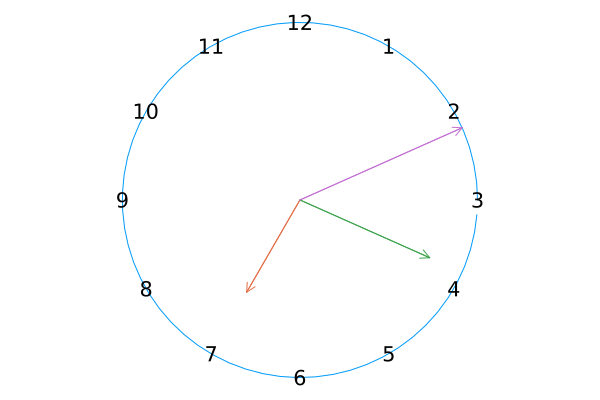

In [32]:
anim = @animate for i in 1:1000
    plot_current_time()
end
gif(anim, "clock.gif", fps=30)